<a href="https://colab.research.google.com/github/MFH97/Artificial-Intelligence/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be working on a wholesale customer segmentation problem. You can download the dataset using this link: https://archive.ics.uci.edu/dataset/292/wholesale+customers The data is hosted on the UCI Machine Learning repository.

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. So, let’s start coding!

Additional Variable Information

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

	(Minimum, Maximum, Mean, Std. Deviation)
FRESH (	3, 112151, 12000.30, 12647.329)
MILK	(55, 73498, 5796.27, 7380.377)
GROCERY	(3, 92780, 7951.28, 9503.163)
FROZEN	(25, 60869, 3071.93, 4854.673)
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION	Frequency
Lisbon	77
Oporto	47
Other Region	316
Total	440

CHANNEL	Frequency
Horeca	298
Retail	142
Total	440

1. Customer Segmentation
You can cluster customers based on their spending habits to identify distinct groups, such as:

High spenders on fresh products (restaurants, hotels)

High spenders on groceries & detergents (retail stores)

Low spenders across all categories (small cafes or local shops)

2. Market Strategy Optimization
By analyzing the clusters, businesses can:

Tailor promotions (e.g., discounts on frozen products for Cluster X)

Optimize inventory (e.g., stock more milk products for Cluster Y)

Improve logistics (e.g., prioritize deliveries to high-spending regions)

3. Anomaly Detection
K-Means can help detect outliers (unusual spending patterns), such as:

A retail store suddenly buying excessive fresh products (possible fraud or bulk order)

A cafe with abnormally low spending (might be closing down)

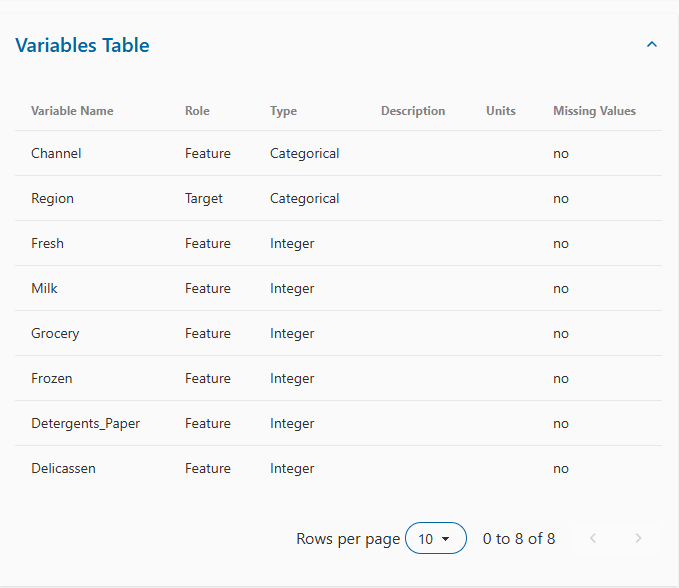

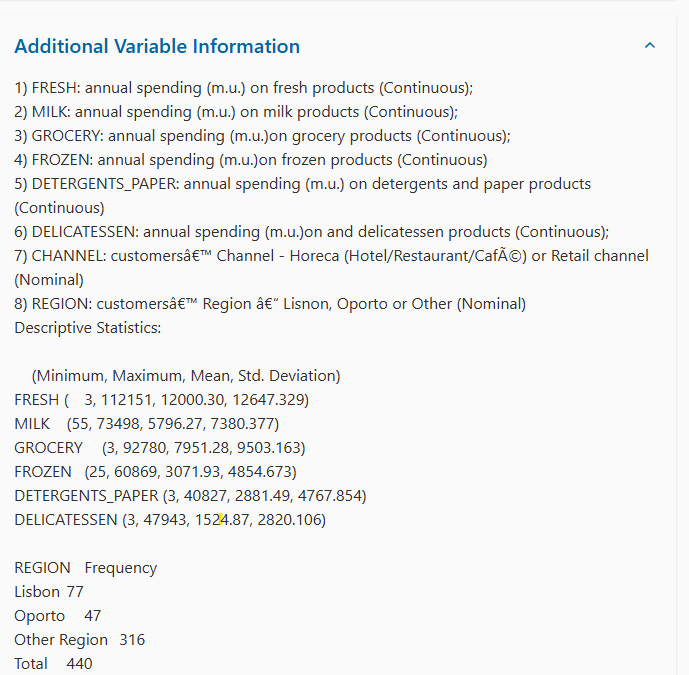

In [11]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [12]:
# reading the data
data=pd.read_csv("Wholesale customers data.csv")
# Display first 5 rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Let’s pull out some statistics related to the data:

In [5]:
# statistics of the data
data.describe()
print("Shape of the data:",data.shape)

Shape of the data: (440, 8)


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude, whereas variables like Fresh, Milk, Grocery, etc., have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference in magnitude can create a problem.

Bring all the variables to the same magnitude:

# Preprocess the Data
We'll drop Channel and Region (since we focus on spending patterns) and scale the data (K-Means is sensitive to feature scales).

In [13]:
# Drop categorical columns (Channel, Region)
data.drop(['Channel', 'Region'], axis=1)

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


The magnitude looks similar now.

Find the Optimal Number of Clusters (K)
# Method 1: Elbow Method

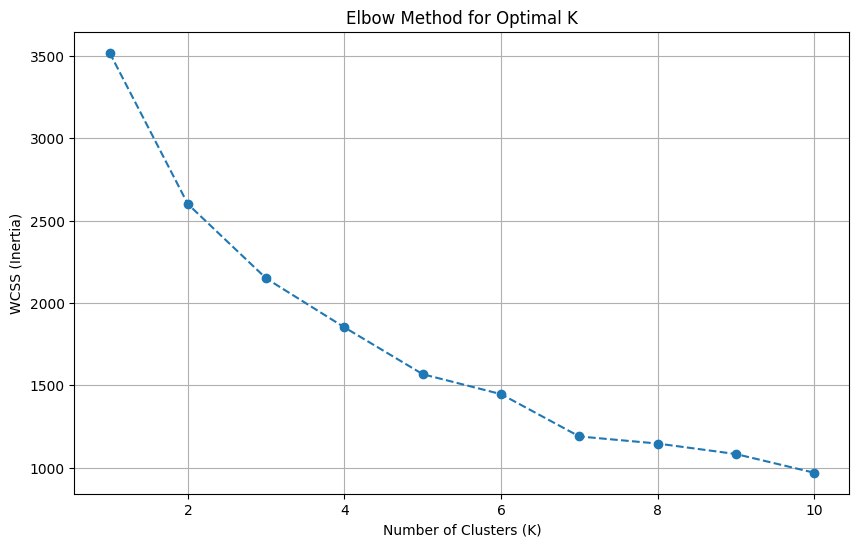

In [15]:
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

Choose K where the curve starts to flatten (e.g., K=3 or K=4)


#Method 2: Silhouette Score (Alternative)

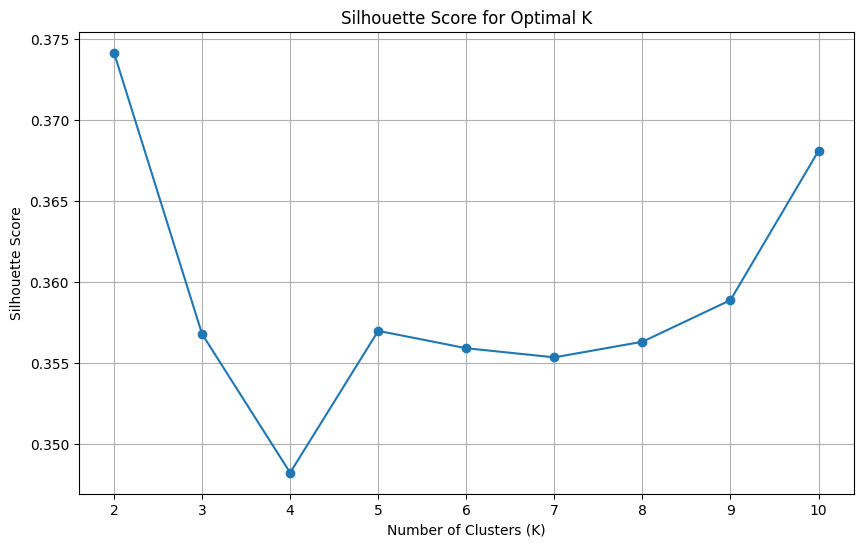

In [18]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, cluster_labels)
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.show()

Higher score = better clustering (e.g., K=2 or K=3)

In [20]:
# Fit K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Display cluster counts
print(data['Cluster'].value_counts())

Cluster
1    297
0    130
2     13
Name: count, dtype: int64


# Analyze Clusters (Mean Spending per Category)

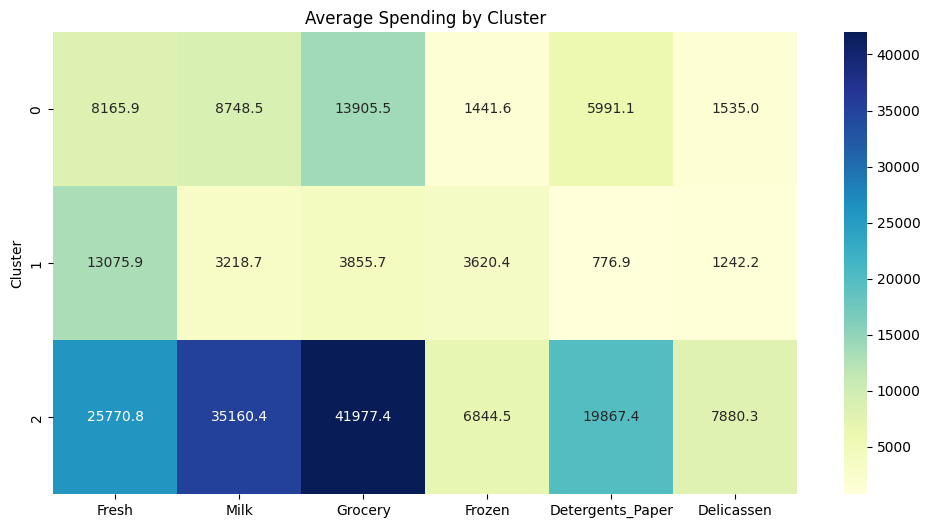

In [21]:
# Group by cluster and compute mean spending
cluster_means = data.groupby('Cluster').mean().drop(['Channel', 'Region'], axis=1)

# Visualize
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Spending by Cluster')
plt.show()

Cluster 0:

Dominated by Fresh, Milk, Grocery and Detergents_Paper

Typical of supermarkets with diverse inventory.

Cluster 1:

Dominated by Fresh and Grocery products.

Likely represents small retail stores or local markets.

cluster 2:

Extremely high spending across all categories.

Represents large retail chains or wholesale buyers.

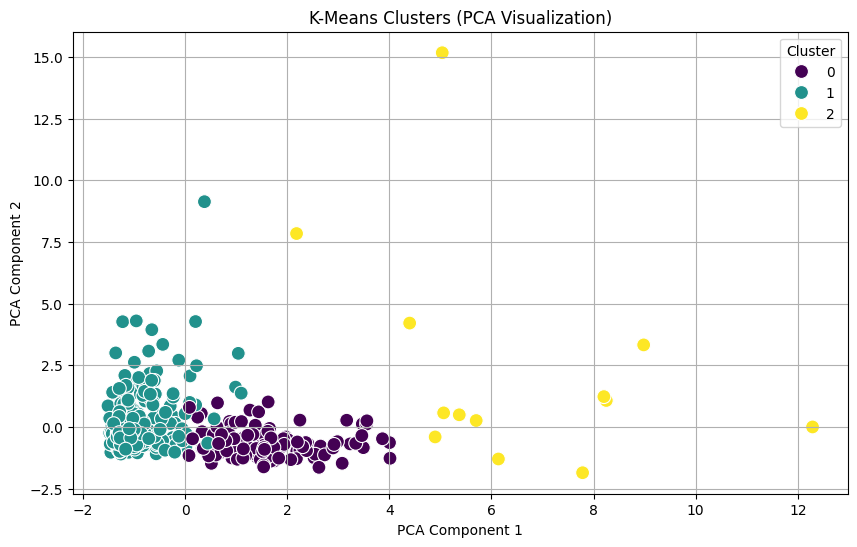

In [23]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

#PCA Visualization (2D Scatter Plot)
The PCA plot reduces the 6-dimensional spending data into 2 components for visualization:

X-axis (PCA Component 1): Captures the highest variance (likely driven by Grocery, Milk, and Detergents_Paper).

Y-axis (PCA Component 2): Captures secondary variance (possibly driven by Fresh and Frozen).



**Observations:**

**Cluster 0** (Supermarkets):

Mid-range PCA1 (due to Fresh/Milk/Grocery/Detergents) and low PCA2.

**Cluster 1** (Retail Stores):

Centered around mid-range PCA1 and high PCA2 (due to Fresh dominance).

**Cluster 2** (Large Chains):

Far right on PCA1 (extreme spending) and mid PCA2.

# **Business Implications:**

**Targeted Marketing:**

* Offer bulk discounts on Fresh, Milk, Detergents_Paper and especially on Grocery to Cluster 0 (Supermarkets).

* Promote Fresh product bundles to Cluster 1 (Retail Stores).

* Supply Chain Optimization:

* Prioritize high-volume deliveries to Cluster 2 (Large Chains).

**Validate Clusters:**

Compare with actual Channel (HORECA vs. Retail) to check alignment.

<Axes: xlabel='Channel', ylabel='count'>

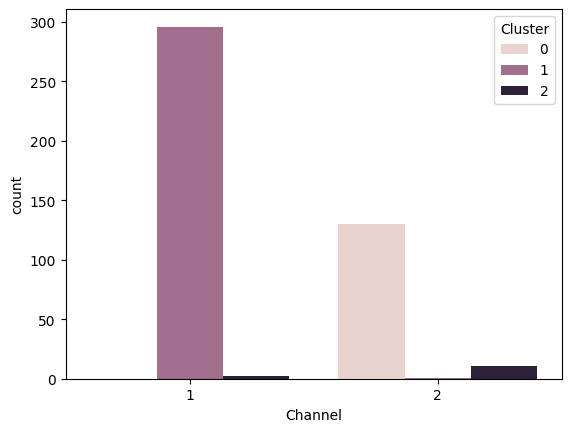

In [24]:
sns.countplot(data=data, x='Channel', hue='Cluster')

A scatter plot showing 3 distinct clusters in 2D space.

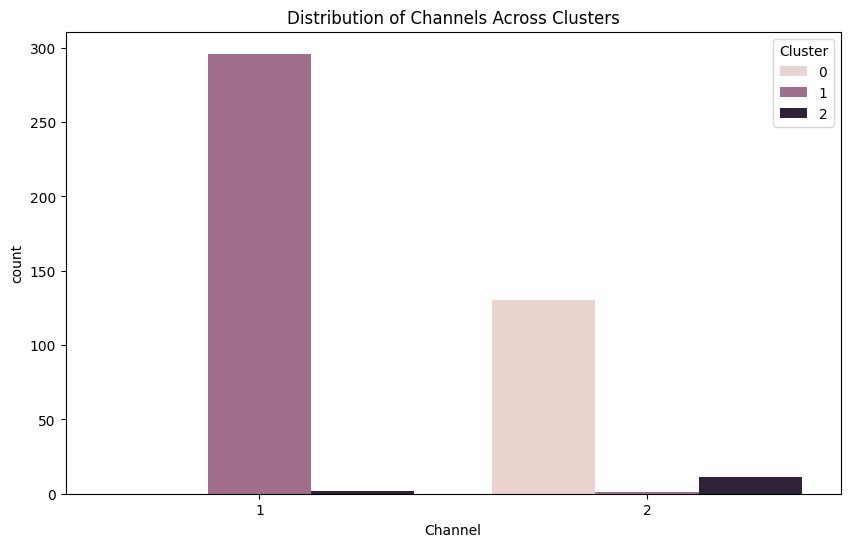

In [25]:
# Plot Channel vs. Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Channel', hue='Cluster')
plt.title('Distribution of Channels Across Clusters')
plt.show()

# Improve Clustering:

Try Gaussian Mixture Models (GMM) for softer clustering.

Use DBSCAN to detect outliers (e.g., anomalous spending).

**Predictive Modeling:**

Train a classifier (e.g., Random Forest) to predict Channel or Region based on clusters.

Reference : https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#How_to_Choose_the_Right_Number_of_Clusters_in_K-Means_Clustering?